In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
importlib.reload(kgs);

local
local


In [2]:
%%time
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

CPU times: user 457 ms, sys: 76.8 ms, total: 533 ms
Wall time: 1.72 s


(1100, 1)

2.8935185185185185e-08
restore
0.0
restore
(67500, 32, 32) (5625, 32, 282) [[[-20.12690728 -20.38798005]
  [  7.03940191  -2.27070424]]

 [[  6.70829617   2.26477281]
  [ -4.69433781  29.51198069]]] [[[        nan  8.85112505]
  [25.34483614 27.27963293]]

 [[        nan 17.74202494]
  [ 4.59100055 18.17648992]]]
CPU times: user 3.95 s, sys: 1.8 s, total: 5.75 s
Wall time: 3.71 s


SensorData(is_FGS=True, loading_step=0, data=None, times=None, time_intervals=None, wavelengths=None)

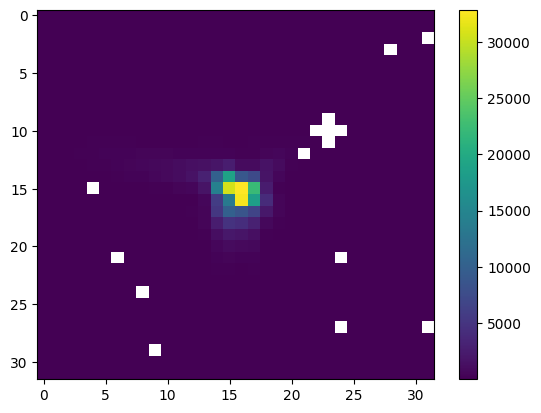

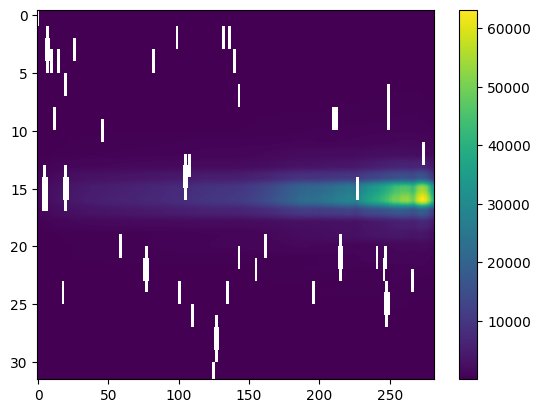

In [11]:
%%time
import ariel_load
import copy
kgs.profiling=False
importlib.reload(ariel_load)
loaders = ariel_load.default_loaders()
d = copy.deepcopy(train_data[0])
d.transits[0].load_to_step(2, d, loaders)
print(d.transits[0].data[0].data.shape, d.transits[0].data[1].data.shape, d.transits[0].data[0].data[:2,:2,:2], d.transits[0].data[1].data[:2,:2,:2])
plt.figure()
plt.imshow(np.mean(d.transits[0].data[0].data.get(), axis=0),aspect='auto')
plt.colorbar()
plt.figure()
plt.imshow(np.mean(d.transits[0].data[1].data.get(), axis=0),aspect='auto')
plt.colorbar()
d.transits[0].load_to_step(0,d,loaders)
d.transits[0].data[0]

AttributeError: 'NoneType' object has no attribute 'get'

<Figure size 640x480 with 0 Axes>

In [13]:
plt.imshow?

Signature:
plt.imshow(
    X,
    cmap=None,
    norm=None,
    *,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    interpolation_stage=None,
    filternorm=True,
    filterrad=4.0,
    resample=None,
    url=None,
    data=None,
    **kwargs,
)
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image set up the colormapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

The number of pixels used to render an image is set by the Axes size
and the *dpi* of the figure. This can lead to aliasing artifacts when
the image is resampled because the displayed image size will usually
not match the size of *X* (see
:doc:`/gallery/images_contours_and_fields/image_antialiasing`).
The resampling can be controlled via the *interpolation* parameter
and/or :rc:`imag